In [1]:
from IPython.display import display

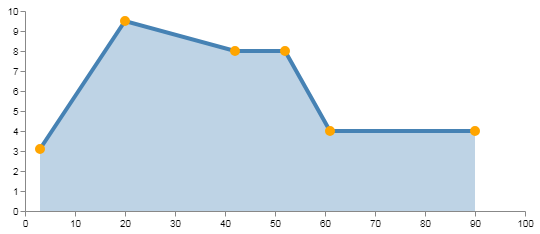

In [2]:
display({
    "application/vnd.vega.v4+json": {
        "$schema": "https://vega.github.io/schema/vega/v4.json",
        "width": 500,
        "height": 200,
        "padding": 5,
        "data": [
          {
            "name": "data_points", 
            "values": [
                {"x": 3, "y": 3.1}, {"x": 20, "y": 9.5}, {"x": 42, "y": 8},
                {"x": 52, "y": 8},  {"x": 61, "y": 4}, {"x": 90, "y": 4}
            ],
            "on": [
              {"trigger": "src", "modify": "src", "values": "drag"},
              {"trigger": "addPoint", "insert": "addPoint"},
              {"trigger": "remPoint", "remove": "remPoint"}
            ]
          }
        ],
        "signals": [
          {
            "name": "src",
            "value": "!datum",
            "on": [
              {"events": "@data_points_point:mousedown", "update": "datum"},
              {"events": "window:mouseup", "update": "!datum"}
            ]
          },
          {
            "name": "drag",
            "value": "datum",
            "on": [
              {
                "events": "window:mousemove, window:mousedown",
                "update": "{x: invert('xscale', clamp(x(), 0, width)), y: invert('yscale', clamp(y(),0,height))}"
              }
            ]
          },
          {
            "name": "addPoint",
            "on": [
              {
                "events": "mousedown[event.buttons && event.shiftKey && !event.altKey]{20}",
                "update": "{x: invert('xscale', x()), y: invert('yscale', y())}"
              }
            ]
          },
          {
            "name": "remPoint",
            "on": [
              {
                "events": "mousedown[event.buttons && !event.shiftKey && event.altKey]{20}",
                "update": "datum"
              }
            ]
          }    
        ],
        "scales": [
          {
            "name": "xscale",
            "type": "linear",
            "range": "width",
            "zero": False,
            "domain": [0, 100]
          },
          {
            "name": "yscale",
            "type": "linear",
            "range": "height",
            "domain": [0, 10]
          }
        ],
        "axes": [
          {
            "orient": "bottom",
            "scale": "xscale"
          },
          {
            "orient": "left",
            "scale": "yscale"
          }
        ],
        "marks": [
          {
            "type": "area",
            "interactive": False,
            "from": {"data": "data_points"},
            "sort": {"field": "x"},
            "encode": {
              "update": {
                "x": {"scale": "xscale", "field": "x"},
                "y": {"scale": "yscale", "field": "y"},
                "y2": {"scale": "yscale", "value": 0},
                "fill": {"value": "steelblue"},
                "fillOpacity": {"value": 0.35}
              }
            }
          },      
          {
            "type": "line",
            "interactive": False,
            "from": {"data": "data_points"},
            "sort": {"field": "x"},
            "encode": {
              "update": {
                "x": {"scale": "xscale", "field": "x"},
                "y": {"scale": "yscale", "field": "y"},
                "stroke": {"value": "steelblue"},
                "strokeWidth": {"value": 4}
              }
            }
          },
          {
            "name": "data_points_point",
            "type": "symbol",
            "from": {"data": "data_points"},
            "sort": {"field": "x"},
            "encode": {
              "update": {
                "x": {"scale": "xscale", "field": "x"},
                "y": {"scale": "yscale", "field": "y"},
                "stroke": {"value": "orange"},
                "fill": {"value": "orange"},
                "strokeWidth": {"value": 2}
              },
              "hover": {
                "stroke": {"value": "cyan"},
                "fill": {"value": "cyan"},
              }
            }
          }
        ]
}}, raw=True)

Interactions
* Drag a point when mouse-down on point
* Insert a point with Shift + click on a location in the chart
* Remove a point with Alt + click on a point (on Mac this is Option + click).